In [83]:
import numpy as np
from numpy import random
import scipy as sp

import anndata as ad
from scanpy.api.tl import diffmap
from scanpy.api.tl import umap
from scanpy.api import pp
import matplotlib.pyplot as plt

# make sure to use viridis as the default color map
import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'viridis'

In [84]:
import tree
import simulation as sim
import sim_utils as sut
import count_model as cm

In [85]:
rseed = np.random.randint(10000)
# rseed = 3887
np.random.seed(rseed)

In [86]:
# top = [["A", "B"], ["B", "C"], ["C", "D"], ["D", "E"]]
top = [["A", "B"]]
top = [["A", "B"], ["B", "C"]]

In [87]:
G = 500
# t = tree.Tree(topology=top, G=G, time={"A":30, "B":30, "C":30, "D":30, "E":30}, num_branches=5, branch_points=0)
t = tree.Tree(topology=top, G=G, time={"A":1, "B":99}, num_branches=2, branch_points=0, modules=50)
t = tree.Tree(topology=top, G=G, time={"A":50, "B":50, "C":50}, num_branches=3, branch_points=0, modules=50)

In [88]:
uMs, Ws, Hs = sim.simulate_lineage(t, intra_branch_tol=-1)

/home/npapado/Documents/repos/prosstt/dev/simulation.py:151: UserWarning: No argument 'a' specified in kwargs: using gamma and a=0.04
  "No argument 'a' specified in kwargs: using gamma and a=0.04", UserWarning)
/home/npapado/miniconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


In [89]:
gene_scale = sut.simulate_base_gene_exp(t, uMs)
t.add_genes(uMs, gene_scale)

In [90]:
M = {}
for i in t.branches:
    M[i] = np.exp(uMs[i]) * gene_scale

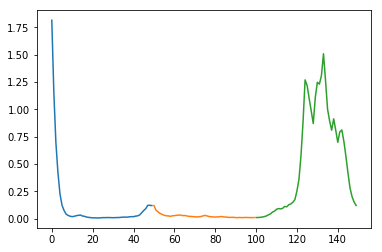

In [91]:
g = 0
timezone = t.populate_timezone()
fig, ax = plt.subplots()
for i, b in enumerate(t.branches):
    x1, x2 = timezone[i]
    x = np.arange(x1, x2+1)
    ax.plot(x, M[b][:, g])

In [92]:
alpha1 = np.exp(random.normal(loc=np.log(0.2), scale=np.log(1.5), size=t.G))
beta1 = np.exp(random.normal(loc=np.log(1), scale=np.log(1.5), size=t.G)) + 1

In [93]:
X1, labs1, brns1, scalings1 = sim.sample_whole_tree(t, 5, alpha=alpha1, beta=beta1)

# normalize gene expression by library size
X1 = (X1.transpose() / scalings1).transpose()

In [94]:
data1 = ad.AnnData(X1)
pp.neighbors(data1, use_rep='X')
umap(data1)
dm1 = data1.obsm["X_umap"]
br_names1, indices1 = np.unique(brns1, return_inverse=True)

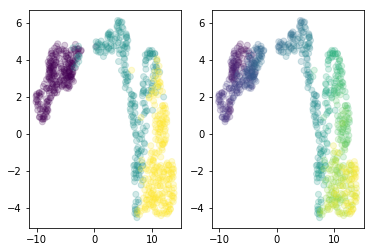

In [95]:
fig, ax = plt.subplots(ncols=2)
# fig.set_size_inches(w=12, h=12)
ax[0].scatter(dm1[:, 0], dm1[:, 1], c=indices1, alpha=0.2)
ax[1].scatter(dm1[:, 0], dm1[:, 1], c=labs1, alpha=0.2)

In [96]:
rseed

6816

In [97]:
# spaced_sample_times = np.arange(0, t.get_max_time(), 2)
# spaced_times = np.repeat(spaced_sample_times, 50)

# X2, labs2, brns2, scalings2 = sim._sample_data_at_times(t, spaced_times, alpha=alpha1, beta=beta1)

# # normalize gene expression by library size
# X2 = (X2.transpose() / scalings2).transpose()

# data2 = ad.AnnData(X2)
# pp.neighbors(data2, use_rep='X')
# umap(data2)
# dm2 = data2.obsm["X_umap"]
# br_names2, indices2 = np.unique(brns2, return_inverse=True)

# fig, ax = plt.subplots(ncols=2)
# # fig.set_size_inches(w=12, h=12)
# ax[0].scatter(dm2[:, 0], dm2[:, 1], c=indices2, alpha=0.2)
# ax[1].scatter(dm2[:, 0], dm2[:, 1], c=labs2, alpha=0.2)

In [98]:
# alpha3 = np.exp(random.normal(loc=np.log(0.0001), scale=np.log(1), size=t.G))
# beta3 = np.exp(random.normal(loc=np.log(1), scale=np.log(1.5), size=t.G)) + 1

# X3, labs3, brns3, scalings3 = sim.sample_whole_tree(t, 2, alpha=alpha3, beta=beta3)

# # normalize gene expression by library size
# X3 = (X3.transpose() / scalings3).transpose()

# data3 = ad.AnnData(X3)
# pp.neighbors(data3, use_rep='X', n_neighbors=150)
# umap(data3)
# dm3 = data3.obsm["X_umap"]
# br_names3, indices3 = np.unique(brns3, return_inverse=True)

# fig, ax = plt.subplots(ncols=2)
# # fig.set_size_inches(w=12, h=12)
# ax[0].scatter(dm3[:, 0], dm3[:, 1], c=indices3, alpha=0.2)
# ax[1].scatter(dm3[:, 0], dm3[:, 1], c=labs3, alpha=0.2)